## EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('trashwheel.csv')

In [3]:
df

,ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered
0,mister,Mister Trash Wheel,1,May,2014,5/16/2014,4.31,18,1450.0,1820.0,126000.0,72.0,584.0,1162.0,7.0,0
1,mister,Mister Trash Wheel,2,May,2014,5/16/2014,2.74,13,1120.0,1030.0,91000.0,42.0,496.0,874.0,5.0,0
2,mister,Mister Trash Wheel,3,May,2014,5/16/2014,3.45,15,2450.0,3100.0,105000.0,50.0,1080.0,2032.0,6.0,0
3,mister,Mister Trash Wheel,4,May,2014,5/17/2014,3.10,15,2380.0,2730.0,100000.0,52.0,896.0,1971.0,6.0,0
4,mister,Mister Trash Wheel,5,May,2014,5/17/2014,4.06,18,980.0,870.0,120000.0,72.0,368.0,753.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,gwynnda,Gwynnda Trash Wheel,215,December,2023,12/27/23,3.96,15,500.0,40.0,1000.0,NaN,40.0,750.0,NaN,66
989,gwynnda,Gwynnda Trash Wheel,216,December,2023,12/27/23,3.38,15,1200.0,90.0,1200.0,NaN,60.0,1000.0,NaN,56
990,gwynnda,Gwynnda Trash Wheel,217,December,2023,12/28/23,4.02,15,180.0,24.0,360.0,NaN,40.0,400.0,NaN,67
991,gwynnda,Gwynnda Trash Wheel,218,December,2023,12/29/23,3.49,15,0.0,0.0,0.0,NaN,0.0,0.0,NaN,58


### Adding output label y=weight/10
### 10:1 ratio for each point

In [4]:
df["Points"]=df["Weight"]/10

In [5]:
print(df.head)

<bound method NDFrame.head of           ID                 Name  Dumpster     Month  Year       Date  \
0     mister   Mister Trash Wheel         1       May  2014  5/16/2014   
1     mister   Mister Trash Wheel         2       May  2014  5/16/2014   
2     mister   Mister Trash Wheel         3       May  2014  5/16/2014   
3     mister   Mister Trash Wheel         4       May  2014  5/17/2014   
4     mister   Mister Trash Wheel         5       May  2014  5/17/2014   
..       ...                  ...       ...       ...   ...        ...   
988  gwynnda  Gwynnda Trash Wheel       215  December  2023   12/27/23   
989  gwynnda  Gwynnda Trash Wheel       216  December  2023   12/27/23   
990  gwynnda  Gwynnda Trash Wheel       217  December  2023   12/28/23   
991  gwynnda  Gwynnda Trash Wheel       218  December  2023   12/29/23   
992  gwynnda  Gwynnda Trash Wheel       219  December  2023   12/29/23   

     Weight  Volume  PlasticBottles  Polystyrene  CigaretteButts  \
0      4.31  

In [6]:
df=pd.read_csv('updated_trashwheel.csv')

### Checking for missing data

In [7]:
df.isnull().sum()

ID                  0
Name                0
Dumpster            0
Month               0
Year                0
Date                0
Weight              0
Volume              0
PlasticBottles      1
Polystyrene         1
CigaretteButts      1
GlassBottles      251
PlasticBags         1
Wrappers          144
SportsBalls       364
HomesPowered        0
Points              0
dtype: int64

In [8]:
X=df.iloc[:,[6,7]].values
y=df.iloc[:,-1].values

In [9]:
X

array([[ 4.31, 18.  ],
       [ 2.74, 13.  ],
       [ 3.45, 15.  ],
       ...,
       [ 4.02, 15.  ],
       [ 3.49, 15.  ],
       [ 3.29, 15.  ]])

In [10]:
df['density'] = df['Weight'] / df['Volume']
avg_density = df['density'].mean()
print(avg_density)

0.1979512177980442


In [11]:
df['density_factor'] = np.clip(df['density'] / avg_density, 0.5, 1.5)
df['Points'] = np.round(10 * df['Weight'] * df['density_factor'])

print(df) 

          ID                 Name  Dumpster     Month  Year       Date  \
0     mister   Mister Trash Wheel         1       May  2014  5/16/2014   
1     mister   Mister Trash Wheel         2       May  2014  5/16/2014   
2     mister   Mister Trash Wheel         3       May  2014  5/16/2014   
3     mister   Mister Trash Wheel         4       May  2014  5/17/2014   
4     mister   Mister Trash Wheel         5       May  2014  5/17/2014   
..       ...                  ...       ...       ...   ...        ...   
988  gwynnda  Gwynnda Trash Wheel       215  December  2023   12/27/23   
989  gwynnda  Gwynnda Trash Wheel       216  December  2023   12/27/23   
990  gwynnda  Gwynnda Trash Wheel       217  December  2023   12/28/23   
991  gwynnda  Gwynnda Trash Wheel       218  December  2023   12/29/23   
992  gwynnda  Gwynnda Trash Wheel       219  December  2023   12/29/23   

     Weight  Volume  PlasticBottles  Polystyrene  CigaretteButts  \
0      4.31      18          1450.0       1

In [12]:
# === GRADE COLUMN WITH REALISTIC DISTRIBUTION ===
grades = ['A+', 'A', 'B', 'C', 'D', 'E', 'F']  # PET, HDPE, PVC, LDPE, PP, PS, Other
weights = [0.25, 0.25, 0.15, 0.15, 0.10, 0.08, 0.02]  # Household realistic mix

# Add grade column to your existing df
df['grade'] = np.random.choice(grades, size=len(df), p=weights)

# Grade multipliers (hazard + market value)
GRADE_MULTIPLIERS = {'A+':0.6, 'A':0.7, 'B':1.0, 'C':0.8, 'D':0.6, 'E':1.1, 'F':0.5}
df['grade_mult'] = df['grade'].map(GRADE_MULTIPLIERS)

# Display distribution check
print("Grade Distribution:")
print(df['grade'].value_counts(normalize=True).round(3))
print("First few rows with grades:")
print(df[['Weight', 'Volume', 'density', 'grade', 'grade_mult']].head())

# === UPDATE YOUR POINTS CALCULATION ===
# Replace your existing points calculation with this:
df['density_factor'] = np.clip(df['density'] / avg_density, 0.5, 1.5)
df['final_points'] = np.round(10 * df['Weight'] * df['density_factor'] * df['grade_mult'])

print("Updated Points with Grades:")
print(df[['Weight', 'grade', 'density_factor', 'grade_mult', 'final_points']].head(10))
print(f"Avg points per kg: {df['final_points'].sum() / df['Weight'].sum():.2f}")

Grade Distribution:
grade
A+    0.240
A     0.235
C     0.168
B     0.143
D     0.119
E     0.078
F     0.018
Name: proportion, dtype: float64
First few rows with grades:
   Weight  Volume   density grade  grade_mult
0    4.31      18  0.239444     C         0.8
1    2.74      13  0.210769     C         0.8
2    3.45      15  0.230000    A+         0.6
3    3.10      15  0.206667     A         0.7
4    4.06      18  0.225556    A+         0.6
Updated Points with Grades:
   Weight grade  density_factor  grade_mult  final_points
0    4.31     C        1.209613         0.8          42.0
1    2.74     C        1.064753         0.8          23.0
2    3.45    A+        1.161902         0.6          24.0
3    3.10     A        1.044028         0.7          23.0
4    4.06    A+        1.139450         0.6          28.0
5    2.71     C        1.053096         0.8          23.0
6    1.91     A        1.206105         0.7          16.0
7    3.70     C        1.168217         0.8          35.0
8  

In [13]:
# === AFFORDABLE BUDGET VERSION ===
RUPEES_PER_POINT = 0.07   # 7 paise/pt 
MAX_POINTS_CAP = 50        # Max ₹3.5 per submission

df['fair_points'] = np.clip(df['Points'], 0, MAX_POINTS_CAP)
df['rupees'] = np.round(df['fair_points'] * RUPEES_PER_POINT, 1)

print(f"✅ NEW Avg ₹{df['rupees'].mean():.1f} → Total: ₹{df['rupees'].sum()*300000/100000:.1f} lakh/year")

✅ NEW Avg ₹2.1 → Total: ₹6361.5 lakh/year


In [14]:
# Simple data display after your rupees calculation
print("📋 DATA PREVIEW")
print(df[['Weight', 'Volume', 'density_factor', 'Points', 'fair_points', 'rupees']].head(30).round(2))

print(f"📈 SUMMARY")
print(f"Avg weight: {df['Weight'].mean():.1f} gm")
print(f"Avg points: {df['fair_points'].mean():.1f} pts") 
print(f"Avg ₹:      ₹{df['rupees'].mean():.1f}")
print(f"Total ₹:    ₹{df['rupees'].sum():.0f}")

📋 DATA PREVIEW
    Weight  Volume  density_factor  Points  fair_points  rupees
0     4.31      18            1.21    52.0         50.0     3.5
1     2.74      13            1.06    29.0         29.0     2.0
2     3.45      15            1.16    40.0         40.0     2.8
3     3.10      15            1.04    32.0         32.0     2.2
4     4.06      18            1.14    46.0         46.0     3.2
5     2.71      13            1.05    29.0         29.0     2.0
6     1.91       8            1.21    23.0         23.0     1.6
7     3.70      16            1.17    43.0         43.0     3.0
8     2.52      14            0.91    23.0         23.0     1.6
9     3.76      18            1.06    40.0         40.0     2.8
10    3.43      15            1.16    40.0         40.0     2.8
11    4.17      19            1.11    46.0         46.0     3.2
12    5.13      15            1.50    77.0         50.0     3.5
13    4.17      15            1.40    59.0         50.0     3.5
14    3.28      15       

In [15]:
df

,ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,...,SportsBalls,HomesPowered,Points,density,density_factor,grade,grade_mult,final_points,fair_points,rupees
0,mister,Mister Trash Wheel,1,May,2014,5/16/2014,4.31,18,1450.0,1820.0,...,7.0,0,52.0,0.239444,1.209613,C,0.8,42.0,50.0,3.5
1,mister,Mister Trash Wheel,2,May,2014,5/16/2014,2.74,13,1120.0,1030.0,...,5.0,0,29.0,0.210769,1.064753,C,0.8,23.0,29.0,2.0
2,mister,Mister Trash Wheel,3,May,2014,5/16/2014,3.45,15,2450.0,3100.0,...,6.0,0,40.0,0.230000,1.161902,A+,0.6,24.0,40.0,2.8
3,mister,Mister Trash Wheel,4,May,2014,5/17/2014,3.10,15,2380.0,2730.0,...,6.0,0,32.0,0.206667,1.044028,A,0.7,23.0,32.0,2.2
4,mister,Mister Trash Wheel,5,May,2014,5/17/2014,4.06,18,980.0,870.0,...,7.0,0,46.0,0.225556,1.139450,A+,0.6,28.0,46.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,gwynnda,Gwynnda Trash Wheel,215,December,2023,12/27/23,3.96,15,500.0,40.0,...,NaN,66,53.0,0.264000,1.333662,A,0.7,37.0,50.0,3.5
989,gwynnda,Gwynnda Trash Wheel,216,December,2023,12/27/23,3.38,15,1200.0,90.0,...,NaN,56,38.0,0.225333,1.138328,A+,0.6,23.0,38.0,2.7
990,gwynnda,Gwynnda Trash Wheel,217,December,2023,12/28/23,4.02,15,180.0,24.0,...,NaN,67,54.0,0.268000,1.353869,D,0.6,33.0,50.0,3.5
991,gwynnda,Gwynnda Trash Wheel,218,December,2023,12/29/23,3.49,15,0.0,0.0,...,NaN,58,41.0,0.232667,1.175374,A+,0.6,25.0,41.0,2.9


In [16]:
(df["fair_points"]==50).sum()

np.int64(125)

In [17]:
# Encode grade first
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['grade_encoded'] = le.fit_transform(df['grade'])


In [18]:
list(df.columns)

['ID',
 'Name',
 'Dumpster',
 'Month',
 'Year',
 'Date',
 'Weight',
 'Volume',
 'PlasticBottles',
 'Polystyrene',
 'CigaretteButts',
 'GlassBottles',
 'PlasticBags',
 'Wrappers',
 'SportsBalls',
 'HomesPowered',
 'Points',
 'density',
 'density_factor',
 'grade',
 'grade_mult',
 'final_points',
 'fair_points',
 'rupees',
 'grade_encoded']

In [19]:
X=df.iloc[:,[6,7,24]].values
y_fairpoints=df.iloc[:,22].values
y_rupees=df.iloc[:,23].values

In [20]:
X

array([[ 4.31, 18.  ,  3.  ],
       [ 2.74, 13.  ,  3.  ],
       [ 3.45, 15.  ,  1.  ],
       ...,
       [ 4.02, 15.  ,  4.  ],
       [ 3.49, 15.  ,  1.  ],
       [ 3.29, 15.  ,  0.  ]])

In [21]:
y_fairpoints

array([50., 29., 40., 32., 46., 29., 23., 43., 23., 40., 40., 46., 50.,
       50., 36., 31., 24., 22., 20., 41., 25., 50., 28., 24., 50., 50.,
       32., 29., 16., 40., 10., 33., 23., 16., 47., 19., 41., 25., 30.,
       50., 28., 10., 41., 34., 24., 14., 18., 22., 41., 11., 14., 18.,
       39., 15., 41., 35., 31., 20., 42., 21., 50., 50., 49., 33., 38.,
       22., 50., 39., 34., 28., 49., 50., 42., 50., 50., 32., 49., 50.,
       17., 27., 40., 50., 50., 38., 33., 50., 50., 26., 42., 41., 38.,
       39., 47., 19., 30., 50., 50., 39., 47., 44., 36., 50., 37., 28.,
       17., 28., 50., 33., 43., 16., 24., 35., 50., 32., 36., 44., 46.,
       15., 31., 33., 45., 50., 23., 28., 21., 36., 39., 26., 50., 50.,
       50., 30., 50., 29., 16., 22., 19., 50., 41., 44., 27., 34., 15.,
       15., 34., 50., 30., 49., 50., 50., 26., 41., 45., 34., 33., 17.,
       32., 28., 25., 14., 13., 21., 39., 22.,  9., 15., 20., 15., 47.,
       15., 21., 23., 15., 20., 20., 42., 42., 43., 33., 31., 33

In [22]:
y_rupees

array([3.5, 2. , 2.8, 2.2, 3.2, 2. , 1.6, 3. , 1.6, 2.8, 2.8, 3.2, 3.5,
       3.5, 2.5, 2.2, 1.7, 1.5, 1.4, 2.9, 1.8, 3.5, 2. , 1.7, 3.5, 3.5,
       2.2, 2. , 1.1, 2.8, 0.7, 2.3, 1.6, 1.1, 3.3, 1.3, 2.9, 1.8, 2.1,
       3.5, 2. , 0.7, 2.9, 2.4, 1.7, 1. , 1.3, 1.5, 2.9, 0.8, 1. , 1.3,
       2.7, 1. , 2.9, 2.4, 2.2, 1.4, 2.9, 1.5, 3.5, 3.5, 3.4, 2.3, 2.7,
       1.5, 3.5, 2.7, 2.4, 2. , 3.4, 3.5, 2.9, 3.5, 3.5, 2.2, 3.4, 3.5,
       1.2, 1.9, 2.8, 3.5, 3.5, 2.7, 2.3, 3.5, 3.5, 1.8, 2.9, 2.9, 2.7,
       2.7, 3.3, 1.3, 2.1, 3.5, 3.5, 2.7, 3.3, 3.1, 2.5, 3.5, 2.6, 2. ,
       1.2, 2. , 3.5, 2.3, 3. , 1.1, 1.7, 2.4, 3.5, 2.2, 2.5, 3.1, 3.2,
       1. , 2.2, 2.3, 3.2, 3.5, 1.6, 2. , 1.5, 2.5, 2.7, 1.8, 3.5, 3.5,
       3.5, 2.1, 3.5, 2. , 1.1, 1.5, 1.3, 3.5, 2.9, 3.1, 1.9, 2.4, 1. ,
       1. , 2.4, 3.5, 2.1, 3.4, 3.5, 3.5, 1.8, 2.9, 3.2, 2.4, 2.3, 1.2,
       2.2, 2. , 1.8, 1. , 0.9, 1.5, 2.7, 1.5, 0.6, 1. , 1.4, 1. , 3.3,
       1. , 1.5, 1.6, 1. , 1.4, 1.4, 2.9, 2.9, 3. , 2.3, 2.2, 2.

## Plotting the data

In [23]:
import matplotlib.pyplot as plt

In [24]:
weight = X[:, 0]
volume = X[:, 1]
grade=X[:,2]
points = y_fairpoints

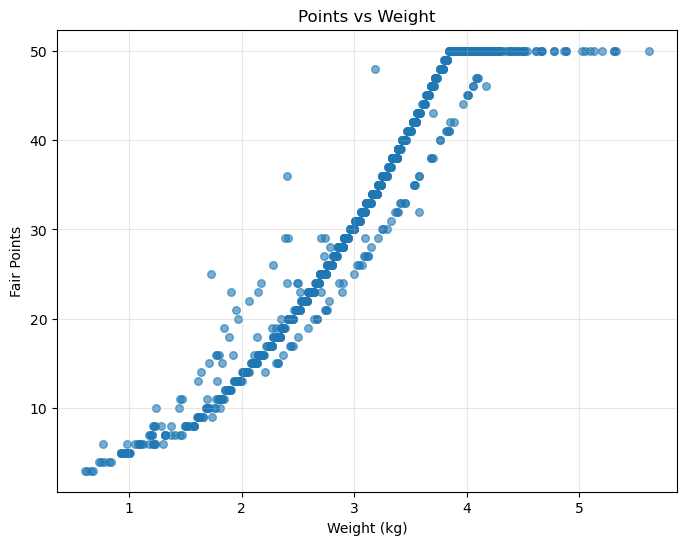

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df['Weight'], df['fair_points'], alpha=0.6, s=30)
plt.xlabel('Weight (kg)')
plt.ylabel('Fair Points')
plt.title('Points vs Weight')
plt.grid(True, alpha=0.3)
plt.show()

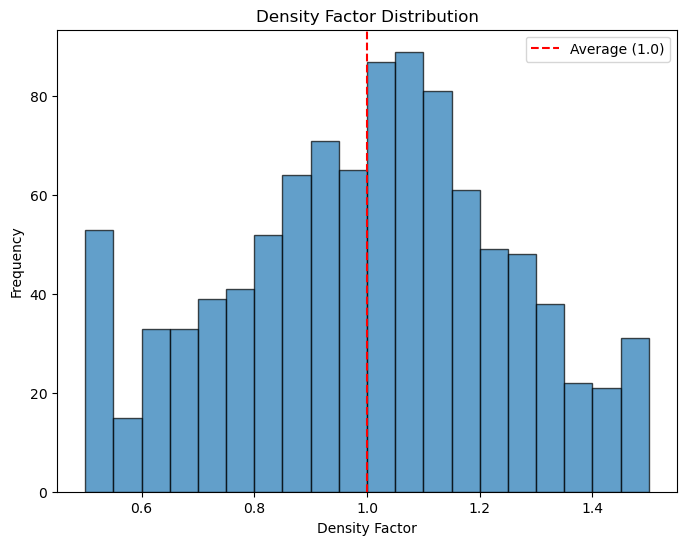

In [26]:
plt.figure(figsize=(8,6))
plt.hist(df['density_factor'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(1.0, color='red', linestyle='--', label='Average (1.0)')
plt.xlabel('Density Factor')
plt.ylabel('Frequency')
plt.title('Density Factor Distribution')
plt.legend()
plt.show()

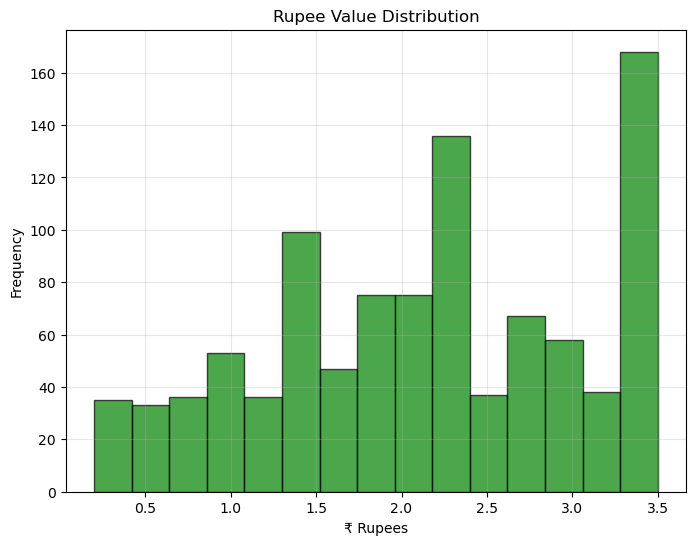

In [27]:
plt.figure(figsize=(8,6))
plt.hist(df['rupees'], bins=15, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('₹ Rupees')
plt.ylabel('Frequency')
plt.title('Rupee Value Distribution')
plt.grid(True, alpha=0.3)
plt.show()

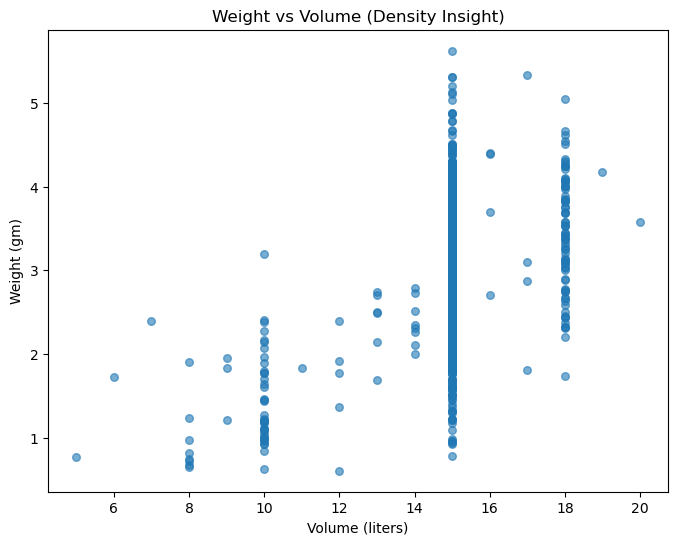

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df['Volume'], df['Weight'], alpha=0.6, s=30)
plt.xlabel('Volume (liters)')
plt.ylabel('Weight (gm)')
plt.title('Weight vs Volume (Density Insight)')
plt.show()

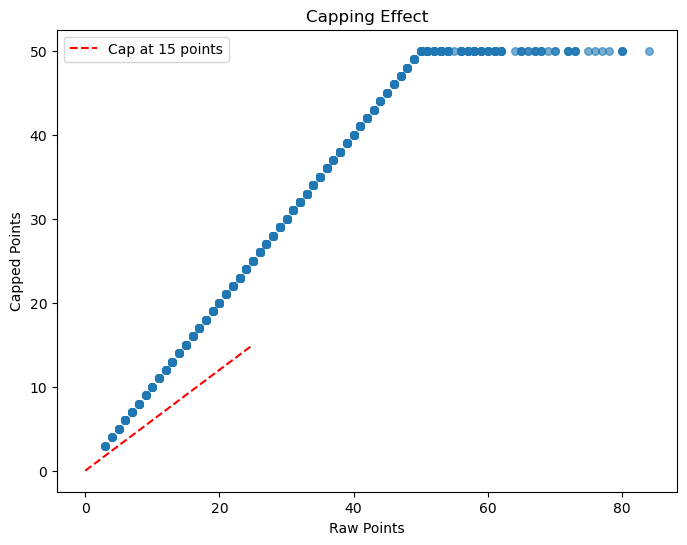

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df['Points'], df['fair_points'], alpha=0.6, s=30)
plt.plot([0,25],[0,15], 'r--', label='Cap at 15 points')
plt.xlabel('Raw Points')
plt.ylabel('Capped Points')
plt.title('Capping Effect')
plt.legend()
plt.show()

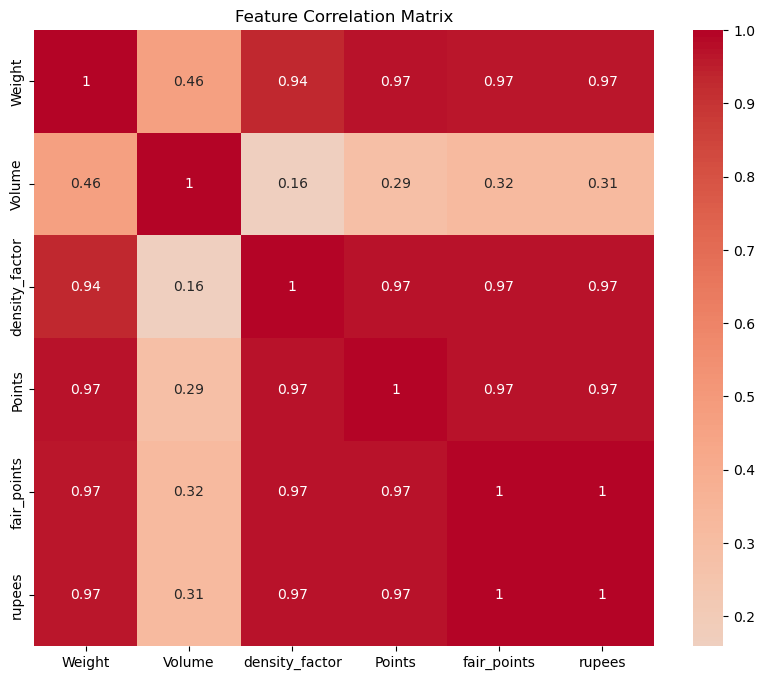

In [30]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df[['Weight','Volume','density_factor','Points','fair_points','rupees']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19808\193581273.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([weight, volume, points], labels=["Weight", "Volume", "Points"])


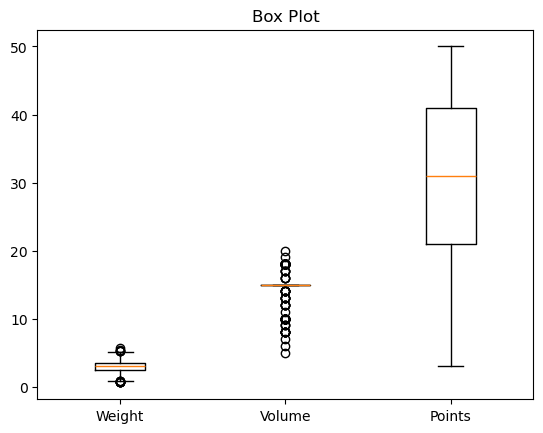

In [31]:
plt.boxplot([weight, volume, points], labels=["Weight", "Volume", "Points"])
plt.title("Box Plot")
plt.show()

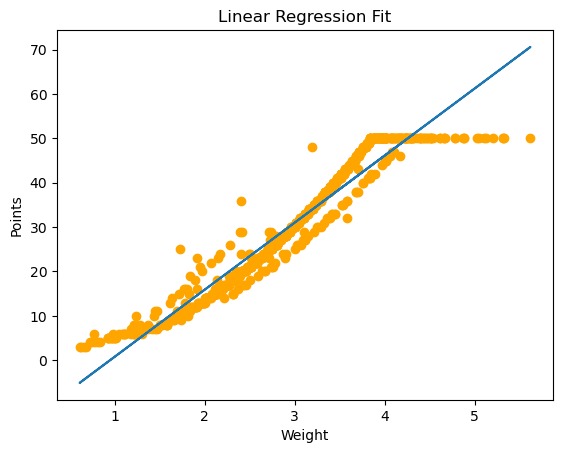

In [32]:
m, b = np.polyfit(weight, points, 1)

plt.scatter(weight, points,c="orange")
plt.plot(weight, m*weight + b)
plt.xlabel("Weight")
plt.ylabel("Points")
plt.title("Linear Regression Fit")
plt.show()

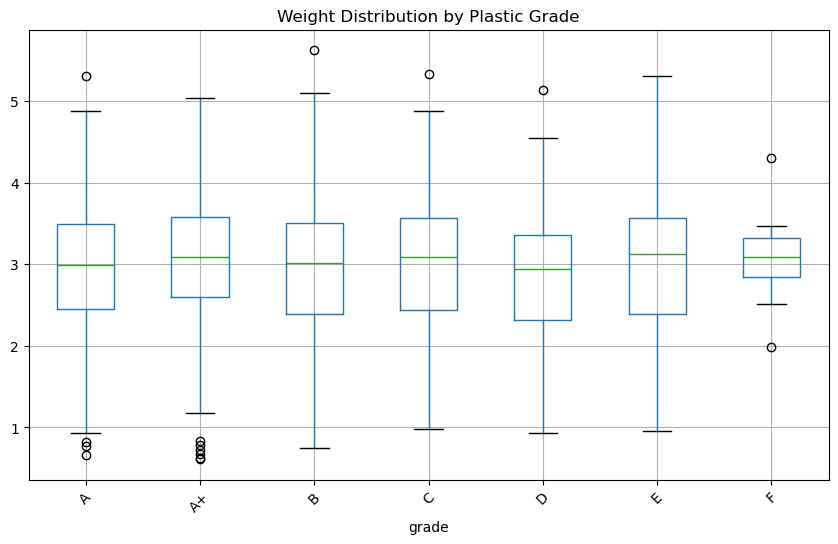

In [33]:
plt.figure(figsize=(10,6))
df.boxplot(column='Weight', by='grade', ax=plt.gca())
plt.title('Weight Distribution by Plastic Grade')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

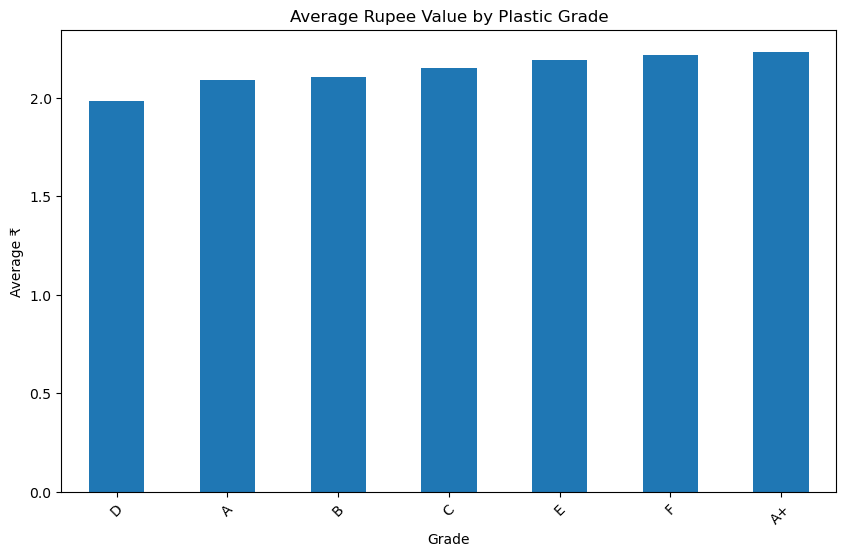

In [34]:
grade_rupees = df.groupby('grade')['rupees'].mean().sort_values()
plt.figure(figsize=(10,6))
grade_rupees.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Average ₹')
plt.title('Average Rupee Value by Plastic Grade')
plt.xticks(rotation=45)
plt.show()

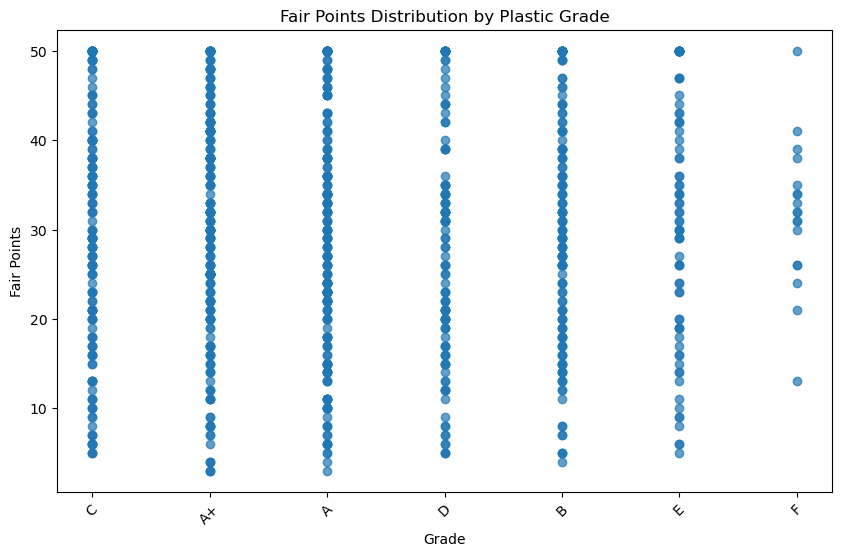

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(df['grade'], df['fair_points'], alpha=0.7)
plt.xlabel('Grade')
plt.ylabel('Fair Points')
plt.title('Fair Points Distribution by Plastic Grade')
plt.xticks(rotation=45)
plt.show()

## Splitting the dataset into training,cross-validation and testing set

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(X,y_fairpoints,test_size=0.3,random_state=42)

In [37]:
X_cv, X_test, y_cv, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42
)

In [38]:
print("Train:", X_train.shape, y_train.shape)
print("CV   :", X_cv.shape, y_cv.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (695, 3) (695,)
CV   : (149, 3) (149,)
Test : (149, 3) (149,)


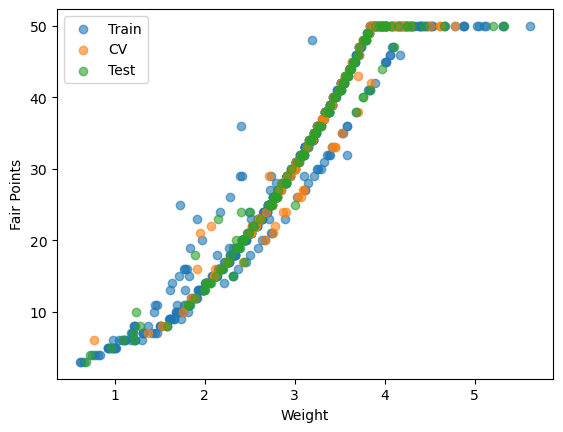

In [39]:
plt.scatter(X_train[:, 0], y_train, label="Train", alpha=0.6)
plt.scatter(X_cv[:, 0], y_cv, label="CV", alpha=0.6)
plt.scatter(X_test[:, 0], y_test, label="Test", alpha=0.6)
plt.xlabel('Weight')
plt.ylabel('Fair Points')
plt.legend()
plt.show()

## Fitting into Model

### 1.Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

# Linear (FAIREST)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate your model
train_pred = model_linear.predict(X_train)
cv_pred = model_linear.predict(X_cv)
test_pred = model_linear.predict(X_test)

print("Model Evaluation:")
print(f"Train R²: {r2_score(y_train, train_pred):.3f}")
print(f"CV R²:    {r2_score(y_cv, cv_pred):.3f}")
print(f"Test R²:  {r2_score(y_test, test_pred):.3f}")
print(f"Train MSE: {mean_squared_error(y_train, train_pred):.3f}")
print(f"CV MSE:    {mean_squared_error(y_cv, cv_pred):.3f}")
print(f"Test MSE:  {mean_squared_error(y_test, test_pred):.3f}")
print(f"CV MAE:    {mean_absolute_error(y_cv, cv_pred):.3f} points")

Model Evaluation:
Train R²: 0.954
CV R²:    0.962
Test R²:  0.954
Train MSE: 8.178
CV MSE:    5.448
Test MSE:  8.440
CV MAE:    1.776 points


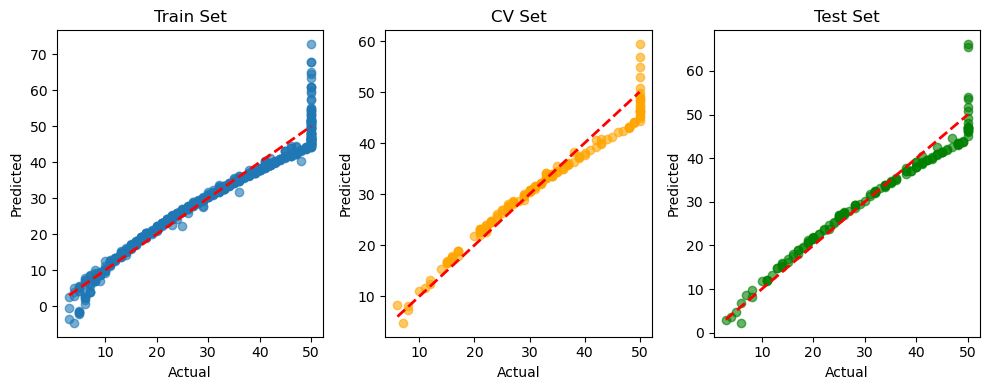

In [41]:
# Predictions vs Actual
plt.figure(figsize=(10,4))

# Plot 1: Train set
plt.subplot(1,3,1)
plt.scatter(y_train, train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Set')

# Plot 2: CV set  
plt.subplot(1,3,2)
plt.scatter(y_cv, cv_pred, alpha=0.6, color='orange')
plt.plot([y_cv.min(), y_cv.max()], [y_cv.min(), y_cv.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CV Set')

# Plot 3: Test set
plt.subplot(1,3,3)
plt.scatter(y_test, test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set')

plt.tight_layout()
plt.show()

In [42]:
def predict_capped(model, X):
    """Stage 2: Post-process predictions with capping"""
    uncapped_pred = model.predict(X)
    return np.clip(uncapped_pred, 0, 15)

In [43]:
a=predict_capped(model_linear,[[7,20,2]])
print(a)

[15.]


### 2.Quadratic Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Quadratic model
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly2.fit_transform(X_train)
X_cv_poly = poly2.transform(X_cv)
X_test_poly = poly2.transform(X_test)

model_quad = LinearRegression()
model_quad.fit(X_train_poly, y_train)

# Evaluate quadratic model
train_pred_quad = model_quad.predict(X_train_poly)
cv_pred_quad = model_quad.predict(X_cv_poly)
test_pred_quad = model_quad.predict(X_test_poly)

print("Quadratic Model Evaluation:")
print(f"Train R²: {r2_score(y_train, train_pred_quad):.3f}")
print(f"CV R²:    {r2_score(y_cv, cv_pred_quad):.3f}")
print(f"Test R²:  {r2_score(y_test, test_pred_quad):.3f}")
print(f"Train MSE: {mean_squared_error(y_train, train_pred_quad):.3f}")
print(f"CV MSE:    {mean_squared_error(y_cv, cv_pred_quad):.3f}")
print(f"Test MSE:  {mean_squared_error(y_test, test_pred_quad):.3f}")
print(f"CV MAE:    {mean_absolute_error(y_cv, cv_pred_quad):.3f} points")

Quadratic Model Evaluation:
Train R²: 0.957
CV R²:    0.960
Test R²:  0.960
Train MSE: 7.695
CV MSE:    5.674
Test MSE:  7.258
CV MAE:    1.905 points


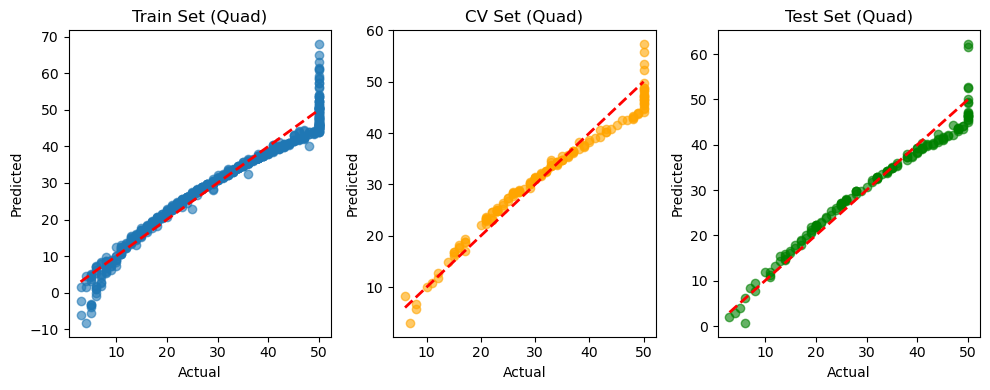

In [45]:
# Predictions vs Actual for QUADRATIC
plt.figure(figsize=(10,4))

# Plot 1: Train set
plt.subplot(1,3,1)
plt.scatter(y_train, train_pred_quad, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Set (Quad)')

# Plot 2: CV set  
plt.subplot(1,3,2)
plt.scatter(y_cv, cv_pred_quad, alpha=0.6, color='orange')
plt.plot([y_cv.min(), y_cv.max()], [y_cv.min(), y_cv.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CV Set (Quad)')

# Plot 3: Test set
plt.subplot(1,3,3)
plt.scatter(y_test, test_pred_quad, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set (Quad)')

plt.tight_layout()
plt.show()

In [46]:
a=predict_capped(model_quad,[[7,20,2]])
print(a)

ValueError: X has 3 features, but LinearRegression is expecting 9 features as input.

## Saving the Linear Regression Model

In [ ]:
import joblib
import numpy as np

# Save the exact model from your plot (model_uncapped)
joblib.dump(model_linear, 'model_linear.pkl')  # Your trained LinearRegression
joblib.dump(le, 'le.pkl')              # Grade encoder

# Save capping parameters (from your business logic)
model_params = {
    'max_points': 50.0,           # hard cap
    'rupees_per_point': 0.07      # conversion rate
}
joblib.dump(model_params, 'model_params.pkl')

print("✅ PRODUCTION FILES SAVED:")
print("- model_linear.pkl  (LinearRegression)")
print("- le.pkl        (Grade encoder)")
print("- model_params.pkl    (15 cap + ₹0.10)")
print("📁 Copy to Flask folder!")